In [1]:
import pandas as pd
import numpy as np

In [4]:
farm=pd.read_csv("agri.csv")

In [5]:
farm

,ID,Est_Insects,Crop_Type,Soil_Type,Pesticide_Category,Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


# EDA

In [6]:
farm.isnull().sum()

ID                       0
Est_Insects              0
Crop_Type                0
Soil_Type                0
Pesticide_Category       0
Doses_Week               0
Number_Weeks_Used     9000
Number_Weeks_Quit        0
Season                   0
Crop_Damage              0
dtype: int64

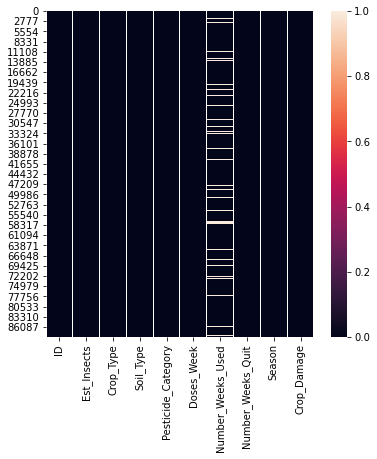

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(farm.isnull())

In [8]:
# we have null values in colum weeks_used
farm["Number_Weeks_Used"].mode()

0    20.0
dtype: float64

In [9]:
farm['Number_Weeks_Used'].isnull().sum()

9000

In [10]:
farm['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [11]:
farm['Number_Weeks_Used']=farm['Number_Weeks_Used'].replace(np.nan,20)

In [12]:
farm.isnull().sum()

ID                    0
Est_Insects           0
Crop_Type             0
Soil_Type             0
Pesticide_Category    0
Doses_Week            0
Number_Weeks_Used     0
Number_Weeks_Quit     0
Season                0
Crop_Damage           0
dtype: int64

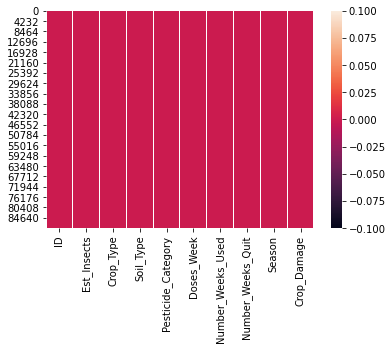

In [13]:
# Done with null values
sns.heatmap(farm.isnull())

In [15]:
items=['Crop_Type','Soil_Type','Pesticide_Category','Crop_Damage']
for i in items:
    print(farm[i].unique())

[1 0]
[0 1]
[1 3 2]
[0 1 2]


In [16]:
# from above the number of types in each category is clear 
# crop type=2
#soil type=2
# presticide type=3
# crop damage =2
# droping id cause it is of no use
farm=farm.drop(['ID'],axis=1)

In [17]:
farm

,Est_Insects,Crop_Type,Soil_Type,Pesticide_Category,Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [18]:
farm.dtypes

Est_Insects             int64
Crop_Type               int64
Soil_Type               int64
Pesticide_Category      int64
Doses_Week              int64
Number_Weeks_Used     float64
Number_Weeks_Quit       int64
Season                  int64
Crop_Damage             int64
dtype: object

In [19]:
farm['Number_Weeks_Used']=farm['Number_Weeks_Used'].astype(int)

In [20]:
farm.dtypes

Est_Insects           int64
Crop_Type             int64
Soil_Type             int64
Pesticide_Category    int64
Doses_Week            int64
Number_Weeks_Used     int32
Number_Weeks_Quit     int64
Season                int64
Crop_Damage           int64
dtype: object

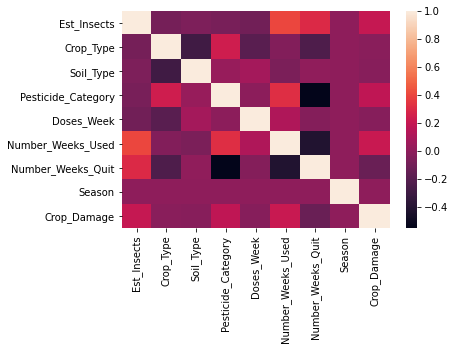

In [21]:

sns.heatmap(farm.corr())
# from this it is clear that 
# most of them arent correlatesd but "insects,pest categroy,weeks used are silghty corellated"

Visulaizing the data

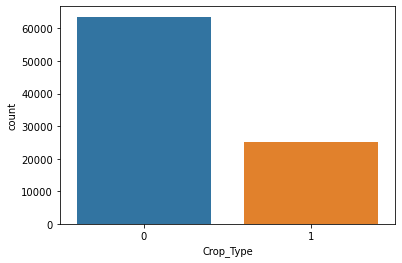

In [22]:
sns.countplot(x="Crop_Type",data=farm)

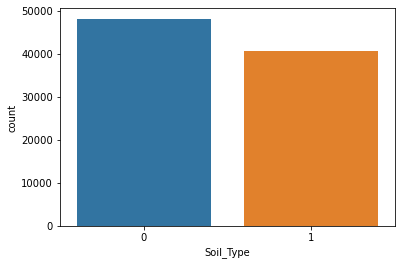

In [23]:
sns.countplot(x='Soil_Type',data=farm)

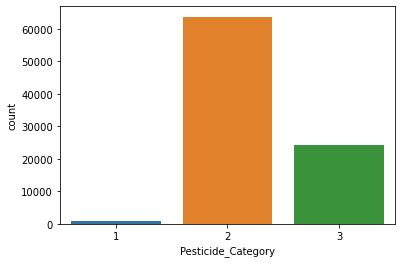

In [24]:
sns.countplot('Pesticide_Category',data=farm )
# 2nd is the higest 

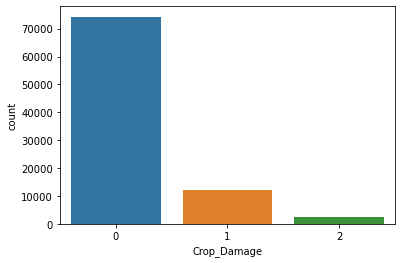

In [25]:
sns.countplot('Crop_Damage',data=farm )
# category 0 has the highest damage

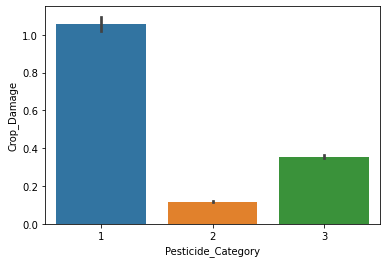

In [26]:
sns.barplot(y='Crop_Damage',x='Pesticide_Category',data=farm)
# from this it is clear tha pest 1 has the higest damage 
# pest 2 is is best for crop cause it is less damage

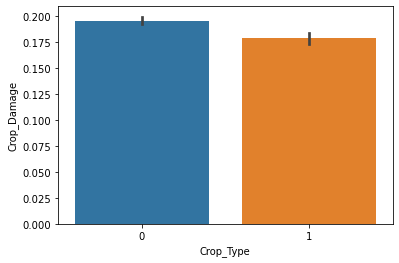

In [27]:
sns.barplot(y='Crop_Damage',x='Crop_Type',data=farm)
#more or less both have more damage but type 0 has more when compared to other 

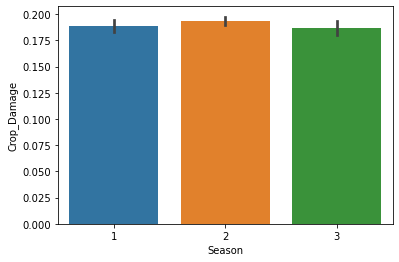

In [28]:
sns.barplot(y='Crop_Damage',x='Season',data=farm)
# season isnt affecting the damage

Removing outlier 

In [29]:
farm.describe()

,Est_Insects,Crop_Type,Soil_Type,Pesticide_Category,Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,27.750490,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.032261,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


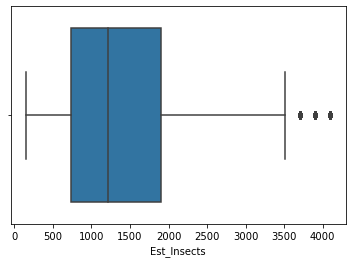

In [31]:
sns.boxplot("Est_Insects",data=farm)
# outlier are presnt so we need to remove them using zscore

In [32]:
from scipy.stats import zscore
z_score=abs(zscore(farm))
print(farm.shape)
data=farm.loc[(z_score<3).all(axis=1)]
print(data.shape)              


(88858, 9)
(84853, 9)


In [33]:
# outliers are removed 
# check the skewness
data.skew()

Est_Insects           0.802312
Crop_Type             0.939630
Soil_Type             0.165963
Pesticide_Category    0.857490
Doses_Week            0.745649
Number_Weeks_Used     0.430761
Number_Weeks_Quit     0.792407
Season                0.145248
Crop_Damage           2.065124
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C50AA7C520>,
      dtype=object)

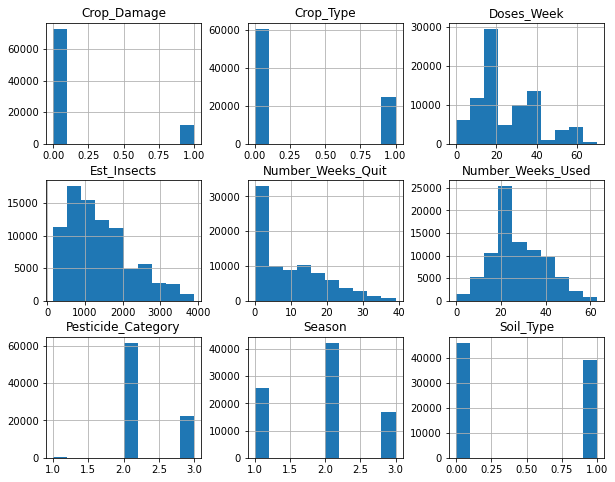

In [34]:

data.hist(figsize=(10,8))

In [35]:
data_new=np.sqrt(data)

In [36]:
data_new.skew()

Est_Insects           0.210446
Crop_Type             0.939630
Soil_Type             0.165963
Pesticide_Category    0.689847
Doses_Week           -0.022322
Number_Weeks_Used    -0.457815
Number_Weeks_Quit    -0.029751
Season               -0.121820
Crop_Damage           2.065124
dtype: float64

In [37]:
# Now we need to split the data 
da_x=data_new.drop(columns='Crop_Damage',axis=1)
y=data_new[['Crop_Damage']]

In [38]:
da_x

,Est_Insects,Crop_Type,Soil_Type,Pesticide_Category,Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,13.711309,1.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
1,14.456832,1.0,0.0,1.000000,0.000000,0.000000,0.000000,1.414214
2,16.031220,1.0,0.0,1.000000,0.000000,0.000000,0.000000,1.414214
3,16.031220,1.0,1.0,1.000000,0.000000,0.000000,0.000000,1.414214
4,18.493242,1.0,0.0,1.000000,0.000000,0.000000,0.000000,1.414214
...,...,...,...,...,...,...,...,...
88852,56.258333,1.0,0.0,1.414214,7.745967,6.633250,3.872983,1.414214
88854,59.295868,1.0,0.0,1.414214,3.162278,4.472136,6.164414,1.000000
88855,59.295868,1.0,0.0,1.414214,3.872983,6.324555,2.828427,1.414214
88856,60.844063,1.0,0.0,1.414214,3.162278,5.000000,4.242641,1.732051


In [39]:
y

,Crop_Damage
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
88852,0.0
88854,0.0
88855,0.0
88856,0.0


In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(da_x)
x=pd.DataFrame(x,columns=da_x.columns)

In [41]:
x

,Est_Insects,Crop_Type,Soil_Type,Pesticide_Category,Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.943480,1.574668,-0.920457,-3.372983,-3.219437,-4.280997,-1.276446,-1.347648
1,-1.876400,1.574668,-0.920457,-3.372983,-3.219437,-4.280997,-1.276446,0.236782
2,-1.734741,1.574668,-0.920457,-3.372983,-3.219437,-4.280997,-1.276446,0.236782
3,-1.734741,1.574668,1.086417,-3.372983,-3.219437,-4.280997,-1.276446,0.236782
4,-1.513215,1.574668,-0.920457,-3.372983,-3.219437,-4.280997,-1.276446,0.236782
...,...,...,...,...,...,...,...,...
84848,1.884780,1.574668,-0.920457,-0.552494,1.965775,1.278473,0.753253,0.236782
84849,2.158088,1.574668,-0.920457,-0.552494,-1.102583,-0.532803,1.954113,-1.347648
84850,2.158088,1.574668,-0.920457,-0.552494,-0.626831,1.019750,0.205836,0.236782
84851,2.297390,1.574668,-0.920457,-0.552494,-1.102583,-0.090388,0.946977,1.452558


In [42]:
y

,Crop_Damage
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
88852,0.0
88854,0.0
88855,0.0
88856,0.0


In [43]:
# now the data is ready for training and testing the data 
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.25)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



In [45]:
knn=KNeighborsClassifier()

ada=AdaBoostClassifier()
xg=XGBClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
lg=LogisticRegression()
rf=RandomForestClassifier()

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [47]:
models=[]
models.append(('K neighbors',knn))
models.append(('XG boost ',xg))
models.append(('Ada boost classifier',ada))
models.append(('Decision tree classifier',dtc))
models.append(('Gaussian ',gb))
models.append(('Logistic_ regression',lg))
models.append(('Random_forest classfier',rf))

In [48]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print('********',name,'******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    As=accuracy_score(y_test,pre)
    print("Accuracy score =",As)
    score.append(As*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross validation score is =',sc)
    cvs.append(sc*100)
    
    print('\n')
    
    
    print('\n')
    
    
  
    
    
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    
    
    print('\n\n')

******** K neighbors ******




<ipython-input-48-51f96996257a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)


KNeighborsClassifier()


Accuracy score = 0.8528330347883473




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

Cross validation score is = 0.8535702799202985




[[17334   909]
 [ 2213   758]]





******** XG boost  ******




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Accuracy score = 0.8705100405392665




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Cross validation score is = 0.8702107821944175




[[17835   408]
 [ 2339   632]]





******** Ada boost classifier ******




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier()


Accuracy score = 0.8646177052889601




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Cross validation score is = 0.8643418540516871




[[17976   267]
 [ 2605   366]]





******** Decision tree classifier ******


DecisionTreeClassifier()


Accuracy score = 0.7903742811350994


Cross validation score is = 0.786088932084194




[[15828  2415]
 [ 2032   939]]





******** Gaussian  ******


GaussianNB()


Accuracy score = 0.8494861883661733




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Cross validation score is = 0.8512604517183906




[[17324   919]
 [ 2274   697]]





******** Logistic_ regression ******


LogisticRegression()


Accuracy score = 0.859479588950693




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Cross validation score is = 0.8578836534950769




[[18057   186]
 [ 2795   176]]





******** Random_forest classfier ******


RandomForestClassifier()


Accuracy score = 0.8515602903742812




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

Cross validation score is = 0.8510718058833356




[[17395   848]
 [ 2301   670]]







In [49]:
# out of all XG boost  is working best so we need to find the best parameter using grid search cv
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05],
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], 
              'missing':[-999],
              'seed': [1337]}

In [51]:
i=GridSearchCV(xg,parameters)
                  

In [111]:
i.fit(x,y)

C:\Users\Akhileshwar Reddy\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[11:53:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:53:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:53:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree...state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                    

In [55]:
xg_boost =XGBClassifier(colsample_bytree=0.7,learning_rate= 0.05,max_depth= 6,min_child_weight= 11,missing=-999,n_estimators= 5,nthread= 4,seed= 1337,silent= 1,subsample= 0.8)
xg_boost.fit(x_train,y_train)
print("score",xg_boost.score(x_test,y_test))


[12:15:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


score 0.8661261431130386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [90]:
# After hyper tuning our model is working okay without it is working 87% so this is our final model 

In [61]:
pre=xg.predict(x_test)
pre

array([0., 0., 1., ..., 0., 0., 0.])

In [62]:
import joblib

In [64]:
joblib.dump(xg,"Agriculture.obj")

['Agriculture.obj']